In [1]:

# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)






In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US =df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

274274     92550.0
765017     90000.0
53863     115000.0
28365      90000.0
654511     76559.0
643122    125000.0
8961      150000.0
542130     85000.0
324933    116000.0
283605     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

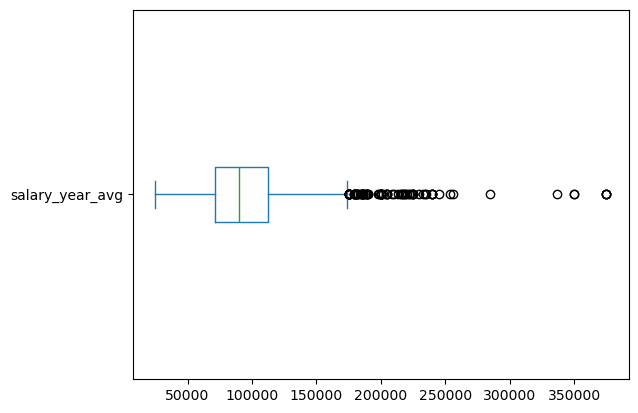

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\Jayesh Alle\AppData\Local\Temp\ipykernel_4728\521434342.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


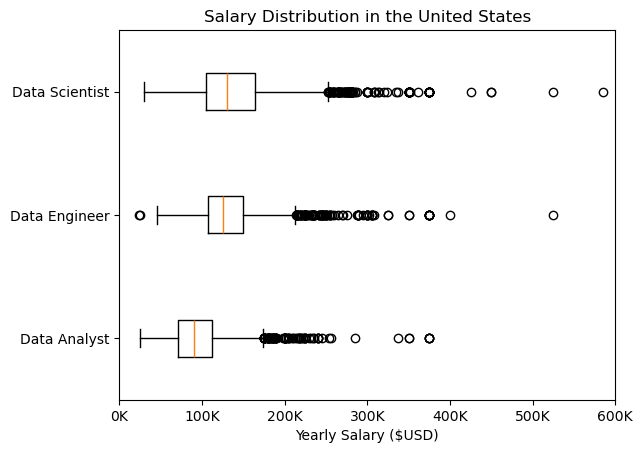

In [5]:


job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [
    df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
    for job_title in job_titles
]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
)

plt.xlim(0, 600000)

plt.show()
